In [42]:
# Importing all the required libraries

In [43]:
# Suppress Warnings

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

In [44]:
# Importing all the required libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [45]:
# Module 1 - Importing Datasets

import aiohttp
import asyncio

# Define an asynchronous function to download the file
async def download(url, filename):
    async with aiohttp.ClientSession() as session:
        async with session.get(url) as response:
            if response.status == 200:
                with open(filename, 'wb') as f:
                    f.write(await response.read())
            else:
                print(f"Failed to download file: {response.status}")

# Run the download in an async context
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv"  # Replace with your URL
await download(url, "housing.csv")

In [46]:
# Loading "Housing.csv" in dataframe

df = pd.read_csv("housing.csv")
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [101]:
# Question 1: Display the data types of each column using the function dtypes. 
# Take a screenshot of your code and output. You will need to submit the screenshot for the final project.

df.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [102]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926378,0.768818,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [50]:
# Moduel 2 - Data Wrangling

# Question 2: Drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop(), then use the method describe() to obtain a statistical summary of the data. Make sure the inplace parameter is set to True. 
# Take a screenshot of your code and output. You will need to submit the screenshot for the final project.

df.drop(["id", "Unnamed: 0"], axis =1, inplace = True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [51]:
# We can see we have missing values for the columns  bedrooms and  bathrooms 

print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())


number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


In [52]:
# Replacing the NaN values for the column bedrooms with the mean value

mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

In [53]:
# # Replacing the NaN values for the column bathrooms with the mean value

mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [54]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


In [55]:
# Module 3 - Exploratory Data Analysis
# Use the method value_counts to count the number of houses with unique floor values, use the method .to_frame() to convert it to a data frame. 
# Take a screenshot of your code and output. You will need to submit the screenshot for the final project.

floor_counts = df['floors'].value_counts().to_frame
print(floor_counts)

<bound method Series.to_frame of floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64>


<Axes: xlabel='waterfront', ylabel='price'>

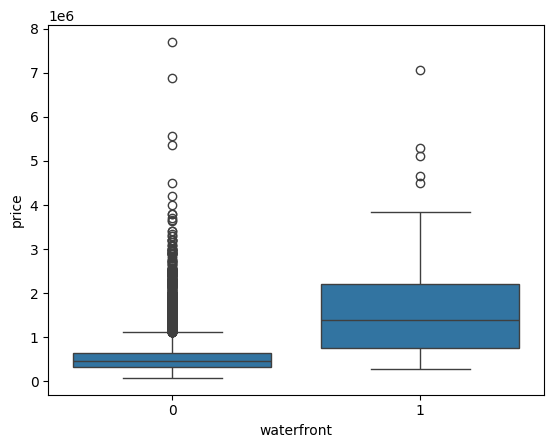

In [56]:
# Question 4: Use the function boxplot in the seaborn library to determine whether houses with a waterfront view or without a waterfront view have more price outliers. 
# Take a screenshot of your code and boxplot. 
# You will need to submit the screenshot for the final project.

sns.boxplot(x = 'waterfront', y = 'price', data =df)

<Axes: xlabel='sqft_above', ylabel='price'>

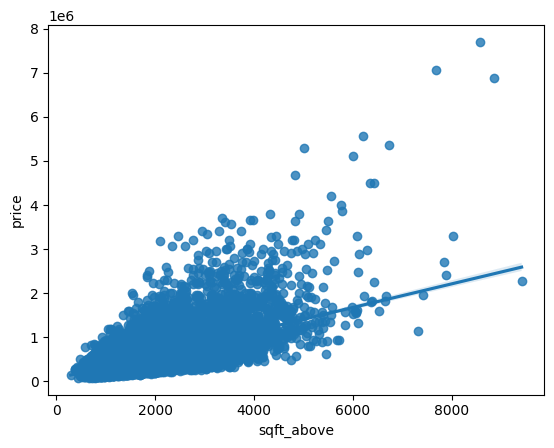

In [57]:
# Question 5: Use the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price. 
# Take a screenshot of your code and scatterplot. 
# You will need to submit the screenshot for the final project.

sns.regplot(x = 'sqft_above', y = 'price', data=df)

In [103]:
# We can use the Pandas method corr() to find the feature other than price that is most correlated with price.

df.select_dtypes(include=['number']).corr()['price'].sort_values()


zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

In [104]:
# Module 4 : Model Development

X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149029567

In [60]:
# Question 6 : Fit a linear regression model to predict the <code>'price'</code> using the feature <code>'sqft_living'</code> then calculate the R^2. 
# Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.

lm.fit(df[['sqft_living']],df['price'])
yhat_a = lm.predict(df[['sqft_living']])
print(yhat_a)
lm.score(df[['sqft_living']],df['price'])


[287555.06702452 677621.82640197 172499.40418656 ... 242655.29616092
 405416.96554144 242655.29616092]


0.4928532179037931

In [85]:
# Question 7: Fit a linear regresssion model to predict the price using the list of features

features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]  

X = df[features]
y = df["price"]

lm.fit(X, y)
yhat = lm.predict(X)
print(yhat)

[283270.39007429 662572.30128747 306267.58455105 ... 304248.55129931
 428758.80343253 304046.65336981]


In [88]:
# Calculating R2 

lm = LinearRegression()
lm.fit(df[features], df['price'])
lm.score (df[features], df['price'])

0.6576951666037507

In [89]:
# For question 8

Input = [('scale', StandardScaler ()), ('polynomial', PolynomialFeatures(include_bias = False)), ('model', LinearRegression())]

In [91]:
# Question 8 

# Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list features, and calculate the R^2. 
# Take a screenshot of your code and the value of the R^2. 
# You will need to submit it for the final project.

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

W = df[features]
y = df['price']
Input = [('scale', StandardScaler ()), ('polynomial', PolynomialFeatures(include_bias = False)), ('model', LinearRegression())]

pipe = Pipeline(Input)
pipe.fit(W, y)
pipe.score(W, y)

0.7513408515988734

In [93]:
# Model 5: Model Evaluation and Refinement
# Importing required libraries

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [95]:
# We will split the data into training and testing sets:

features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


In [97]:
# Question 9
# Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and 
# calculate the R^2 using the test data. 
# Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.

from sklearn.linear_model import Ridge

Ridge_test = Ridge(alpha = 0.1)
Ridge_test.fit(x_test, y_test)
Ridge_test.score(x_test, y_test)

0.6535654800366466

In [98]:
# Question 10
# Perform a second order polynomial transform on both the training data and testing data. 
# Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided. 
# Take a screenshot of your code and the R^2. You will need to submit it for the final project.

pr = PolynomialFeatures (degree = 2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
pr

Ridge_test.fit(x_train_pr, y_train)
Ridge_test.score(x_train_pr, y_train)

0.7418167438660999